In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import io
import scipy.io as sio
%matplotlib inline 
import pylab
import csv
from Tkinter import Tk
from tkFileDialog import askopenfilename
from tkFileDialog import askdirectory
import nibabel as nb
from scipy import io
#from nifti import NiftiImage
import nibabel as nb
from scipy.interpolate import interp1d
from scipy import ndimage

# Open data

In [13]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

/media/sophie/db554c18-e3eb-41e2-afad-7de1c92bf4a5/ArclightCombo/100632series/100632/100632seriespreprocessed238Smith0_4_60TS.mat


In [14]:
Ua=sio.loadmat(filename)
DT=Ua['TSo']
DT.shape

(30511, 238)

In [15]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename2 = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename2)

/media/sophie/db554c18-e3eb-41e2-afad-7de1c92bf4a5/ArclightCombo/100632series/100632/100632seriespreprocessed238Smith0_4_60IC.nii


In [16]:
img1 = nb.load(filename2)
data = img1.get_data()
S=data.shape
S

(78, 55, 10, 238)

In [17]:
S=data.shape
S

(78, 55, 10, 238)

In [20]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename3 = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename3)

/media/sophie/db554c18-e3eb-41e2-afad-7de1c92bf4a5/ArclightCombo/100632series/100632seriesRegistration/Mask100632seriespreprocessed238Smith0_4_60IC.nii


In [21]:
img3 = nb.load(filename3)
Mask = img3.get_data()

In [22]:
Mask.shape

(78, 55, 10, 1)

In [23]:
for i in range(S[3]):
    data[:,:,:,i]=np.multiply(data[:,:,:,i],np.squeeze(Mask))

Z-score

In [24]:
Demean=np.zeros(S)
Dmaps=np.zeros(S)
Dvar=np.zeros(S)
Var=np.zeros(S[3])
D2=np.zeros([S[0],S[1],5,S[3]])
Tvar=np.zeros(S[3])

In [25]:
for i in range(S[3]):
    Demean[:,:,:,i]=data[:,:,:,i]-np.mean(np.mean(np.mean(data[:,:,:,i],0),0),0)

In [26]:
for i in range(S[3]):
    Dsq=np.reshape(Demean[:,:,:,i],S[0]*S[1]*S[2])
    Var[i]=np.sqrt(np.var(Dsq))
    Dvar=Demean[:,:,:,i]/Var[i]
    Dmaps[:,:,:,i]=Dvar-2.5
    Tvar[i]=np.var(DT[i,:])
Dmaps[Dmaps<0]=0

# Open Masks

In [27]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
from Tkinter import Tk
from tkFileDialog import askopenfilename

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filenameM = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filenameM)
img1 = nb.load(filenameM)
Masks = img1.get_data()
Sm=Masks.shape
Masks=np.array(Masks)

/media/sophie/db554c18-e3eb-41e2-afad-7de1c92bf4a5/ArclightCombo/100632series/100632seriesRegistration/100632JFRCTransformedfullpsftrimmed.nii


In [28]:
filenameM='/home/sophie/RegionList'
with open(filenameM) as f:
    content = f.readlines()
Names=[Line.split('\t') for Line in content]
RegionName=[Names[i][0] for i in range(75)]
Num=[int(Names[i][2]) for i in range(75)]

# Average in masks to sort components by brain region

In [29]:
Dmaps.shape

(78, 55, 10, 238)

In [30]:
M=np.zeros((S[3],86))
Mapmean=np.zeros(S[3])
MMasks=np.zeros(86)

In [31]:
for i in range(S[3]):
    Mapmean[i]=np.mean(np.mean(np.mean(Dmaps[:,:,:,i])))
    for j in range(86):
        MMasks[j]=np.mean(np.mean(np.mean(Masks[:,:,:,j])))
        if MMasks[j]:
            M[i,j]=np.mean(np.mean(np.mean(Masks[:,:,:,j]*Dmaps[:,:,:,i])))/(MMasks[j]*Mapmean[i])

In [32]:
CompMainName=S[3]*['']
CompNameAdd=np.zeros((S[3],86))
for i in range(S[3]):
    Max=np.max(M[i,:])
    I=np.argmax(M[i,:])+1
    for j in range(86):
        J=[l for l in range(74) if Num[l]==(j+1)]
        if M[i,j]>0.2*Max:
            CompNameAdd[i,J]=1
    J=[l for l in range(74) if Num[l]==I]
    if J!= []:
        CompMainName[i]=Names[np.array(J)][0]

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


In [42]:
DT[DT>2]=0
DT[DT<-2]=0

AME_R
LO_R
105
accessory medulla


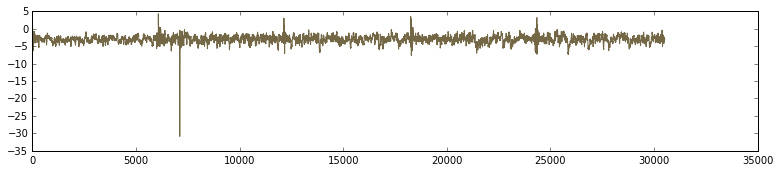

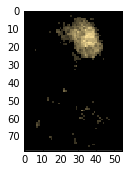

LO_R
MB_VL_R
ME_R
SCL_R
6
LO_R
8
LO_R
23
LO_R
40
lobula


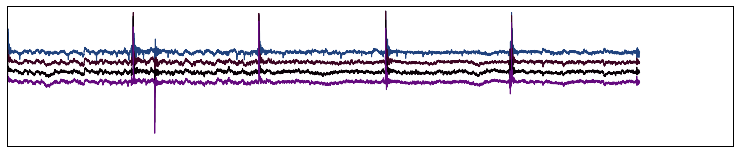

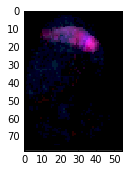

NO
PB
210
nodulus


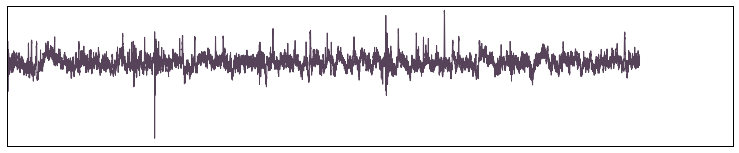

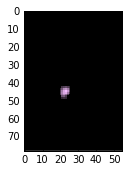

PB
IB_L
15
LO_R
PB
82
PB
ATL_L
126
PB
SMP_R
127
PB
131
PB
AL_L
135
PB
SPS_R
IPS_L
158
PB
ATL_R
169
PB
IPS_R
202
PB
SMP_R
SLP_L
SIP_L
208
PB
PLP_R
209
PB
IB_R
SLP_R
AOTU_R
212
protocerebral bridge


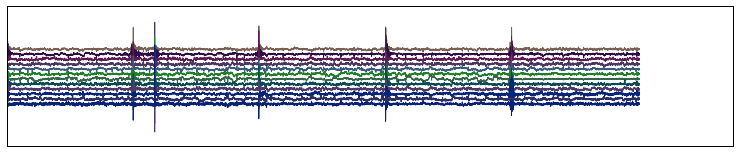

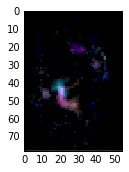

LH_R
13
LH_R
SLP_R
24
LH_R
30
LH_R
63
lateral horn


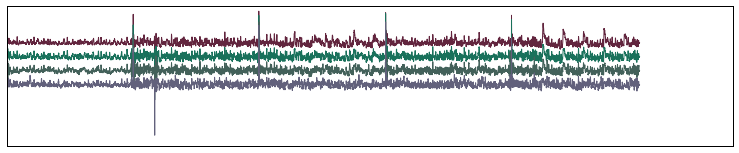

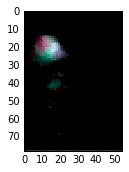

AMMC_R
AVLP_R
10
antennal mechanosensory and motor center


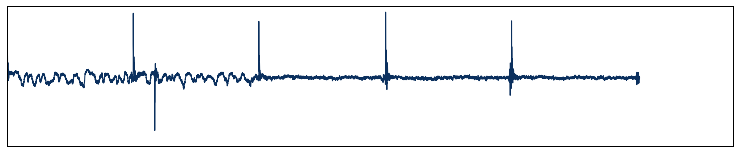

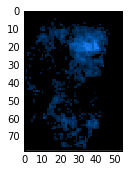

PB
IB_R
51
IB_R
144
IB_R
165
IB_R
MB_CA_R
LO_L
ATL_L
234
inferior bridge


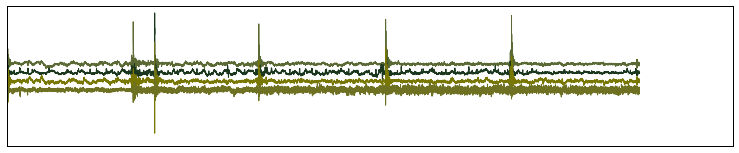

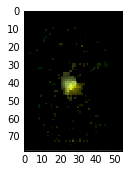

LH_R
ATL_R
SLP_L
56
ATL_R
SMP_R
75
SAD
ATL_R
LAL_L
AL_L
88
BU_R
ATL_R
101
ATL_R
109
AME_R
ATL_R
IB_L
119
ATL_R
SMP_R
120
ATL_R
121
ATL_R
SPS_R
141
ATL_R
143
ATL_R
181
ATL_R
ATL_L
193
ATL_R
IB_L
233
antler


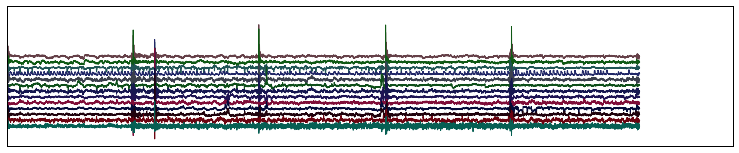

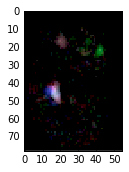

MB_VL_R
37
vertical lobe of adult mushroom body


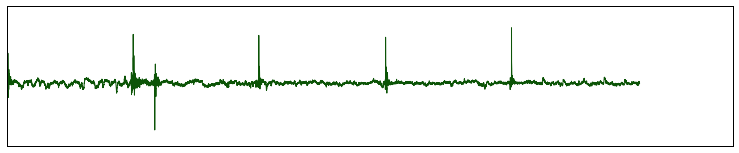

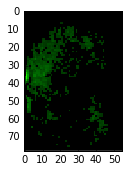

VES_R
FLA_R
AL_R
FLA_L
103
flange


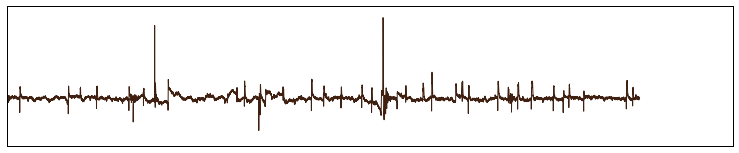

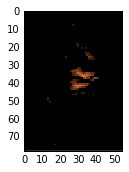

LOP_R
ME_R
SIP_R
CRE_L
54
lobula plate


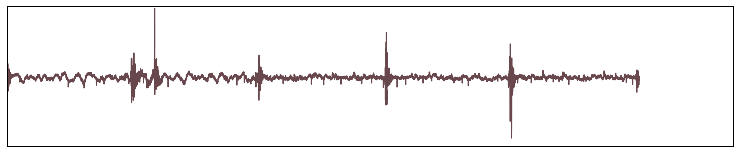

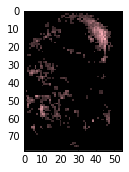

EB
FB
163
ellipsoid body


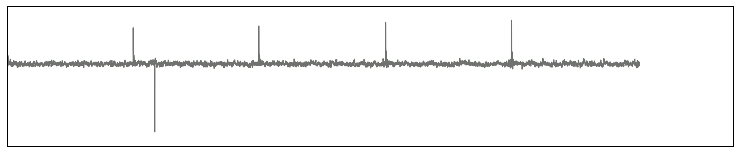

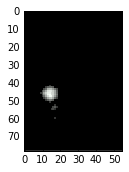

AL_R
14
CRE_R
AL_R
GA_R
44
adult antennal lobe


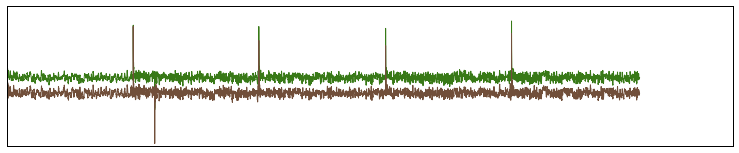

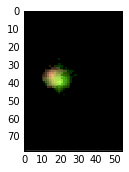

ATL_R
FB
SMP_L
164
fan-shaped body


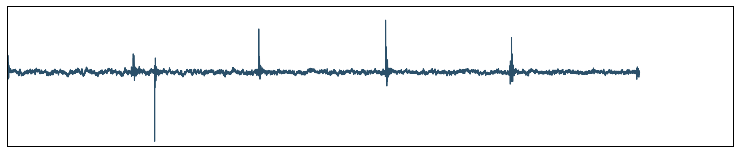

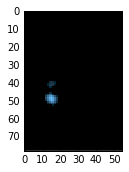

SLP_R
97
superior lateral protocerebrum


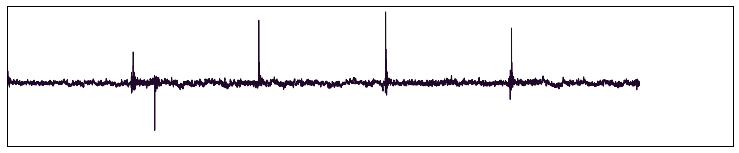

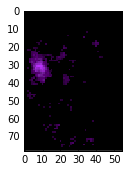

CRE_R
MB_VL_R
SIP_R
SMP_R
61
MB_VL_R
SMP_R
74
ATL_R
SMP_R
138
SMP_R
173
superior medial protocerebrum


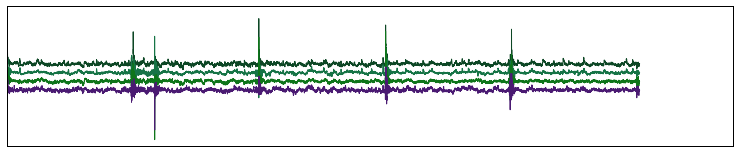

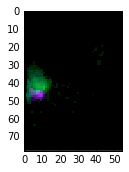

AVLP_R
AVLP_L
20
anterior ventrolateral protocerebrum


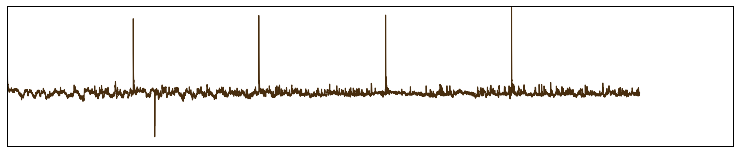

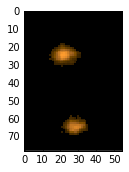

LO_R
PLP_R
33
PLP_R
46
PLP_R
SPS_R
IPS_R
IB_L
70
PLP_R
92
PLP_R
96
PLP_R
SPS_R
100
IB_R
SMP_R
PLP_R
200
posterior lateral protocerebrum


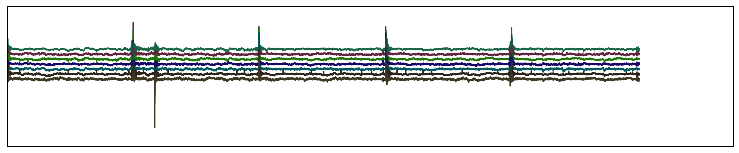

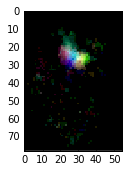

MB_CA_R
2
MB_CA_R
SCL_R
22
ATL_R
MB_CA_R
36
PB
MB_CA_R
186
calyx of adult mushroom body


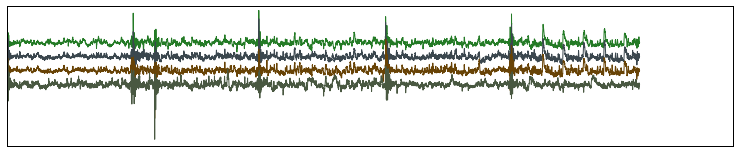

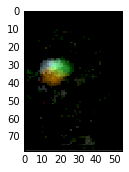

IB_R
MB_VL_R
SPS_R
57
SPS_R
66
SPS_R
BU_L
146
ICL_R
SPS_R
151
superior posterior slope


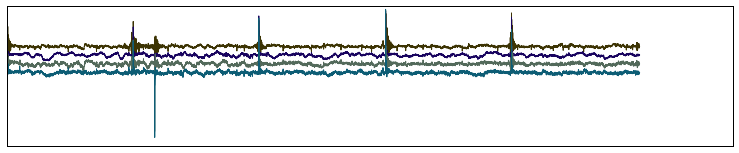

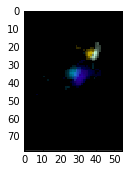

SPS_R
IPS_R
41
SPS_R
IPS_R
58
IPS_R
177
IPS_R
183
IPS_R
203
inferior posterior slope


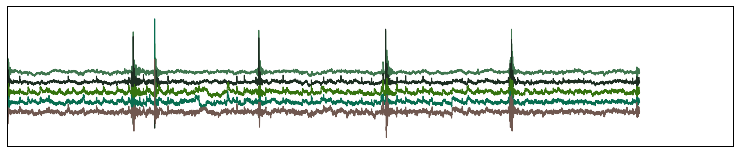

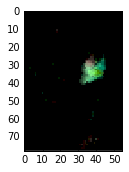

FLA_R
AL_R
PRW
0
PB
CAN_R
MB_VL_R
PRW
17
FLA_R
PRW
73
FLA_R
PRW
BU_L
VES_L
142
SAD
AMMC_R
IB_R
PRW
213
prow


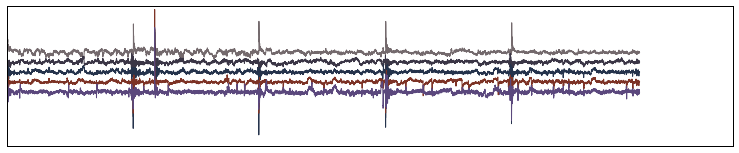

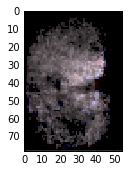

LO_L
LOP_L
114
LO_L
153
LO_L
LOP_L
194
lobula


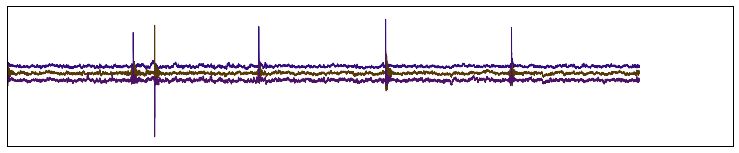

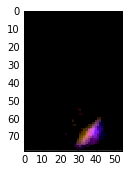

LH_L
45
LH_L
59
LH_L
PLP_L
85
LH_L
104
LH_L
111
lateral horn


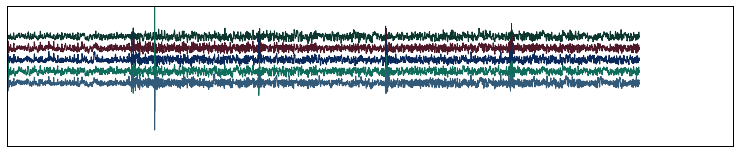

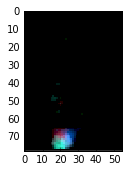

SAD
CAN_L
FLA_L
89
SAD
CAN_L
206
cantle


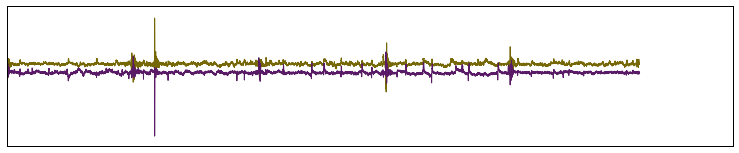

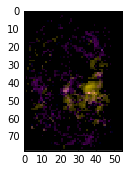

IB_L
18
PLP_R
IB_L
78
IB_L
SPS_L
99
inferior bridge


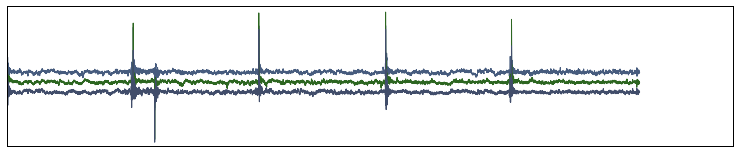

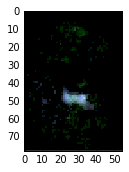

ATL_L
148
SMP_R
SPS_R
IB_L
ATL_L
162
ATL_R
ATL_L
176
antler


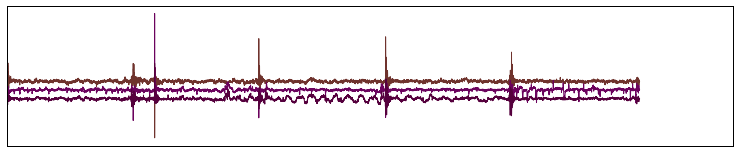

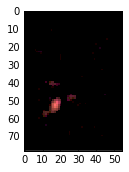

IB_R
ICL_L
MB_PED_L
MB_VL_L
221
pedunculus of adult mushroom body


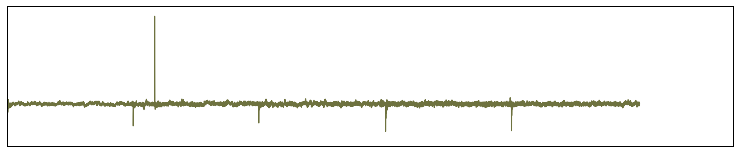

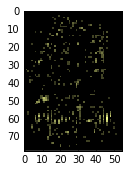

MB_VL_L
MB_ML_L
31
MB_VL_L
SCL_L
71
MB_VL_L
SLP_L
SMP_L
AOTU_L
93
MB_VL_L
SMP_L
110
MB_VL_L
AOTU_L
178
vertical lobe of adult mushroom body


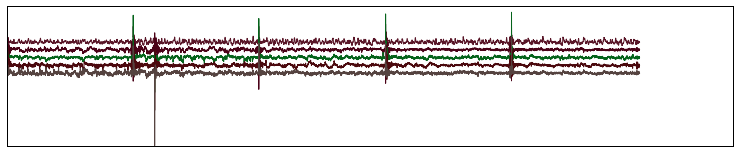

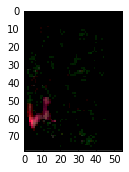

LAL_L
AL_L
12
AL_R
AL_L
38
FLA_L
AL_L
53
AL_R
AL_L
80
AL_L
SLP_L
147
AMMC_R
AMMC_L
FLA_L
AL_L
195
adult antennal lobe


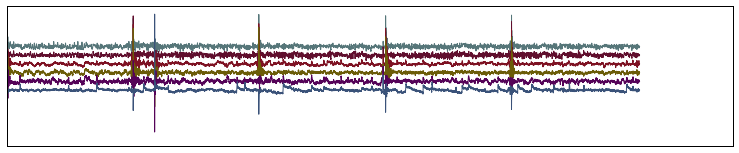

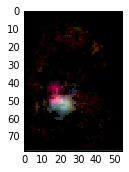

LO_L
ME_L
25
ME_L
113
medulla


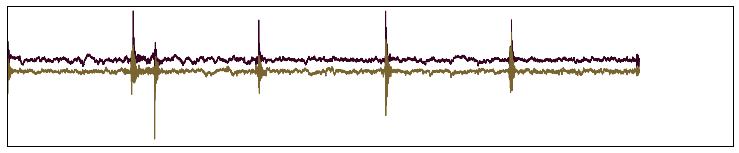

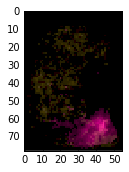

PB
SPS_R
MB_VL_L
SLP_L
19
MB_VL_L
SLP_L
28
superior lateral protocerebrum


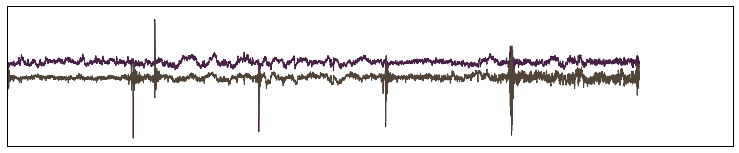

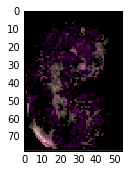

CRE_L
SLP_L
SIP_L
SMP_L
26
superior intermediate protocerebrum


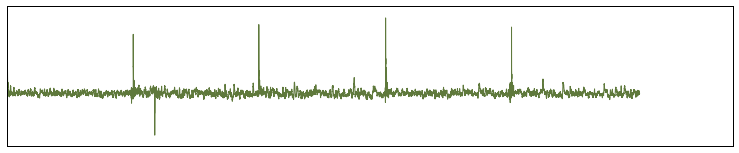

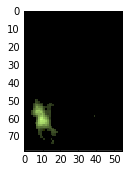

MB_VL_L
SMP_L
72
SLP_L
SMP_L
SCL_L
87
SMP_L
137
superior medial protocerebrum


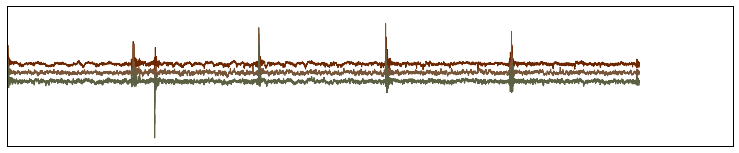

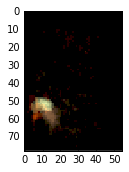

AMMC_L
IVLP_L
IPS_L
4
wedge


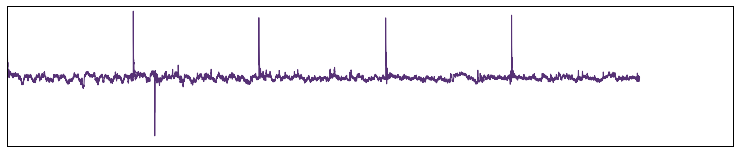

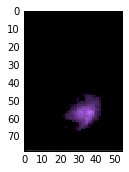

SLP_L
SMP_L
PLP_L
SCL_L
139
posterior lateral protocerebrum


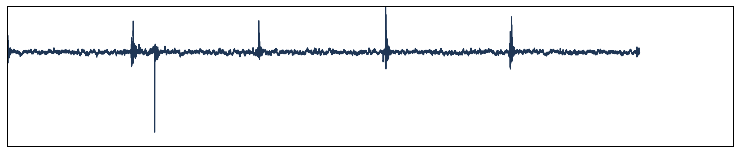

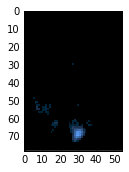

SLP_L
AOTU_L
179
anterior optic tubercle


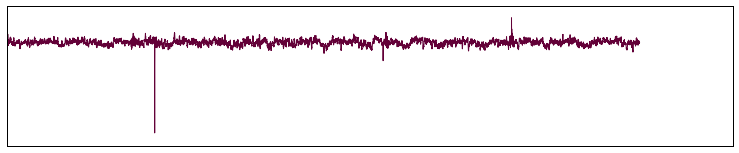

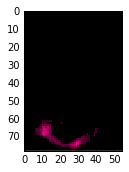

MB_CA_L
1
MB_PED_L
MB_CA_L
SCL_L
5
MB_CA_L
7
MB_CA_L
9
calyx of adult mushroom body


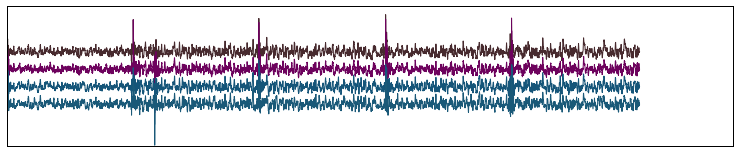

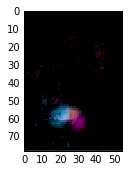

PB
IB_L
SPS_L
76
PB
SPS_L
IPS_L
91
superior posterior slope


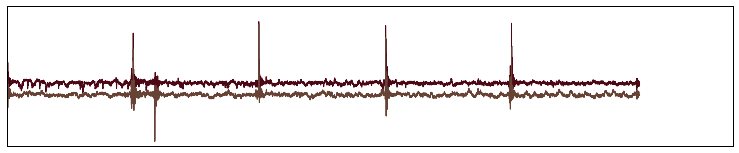

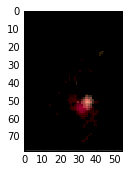

PLP_L
SCL_L
3
superior clamp


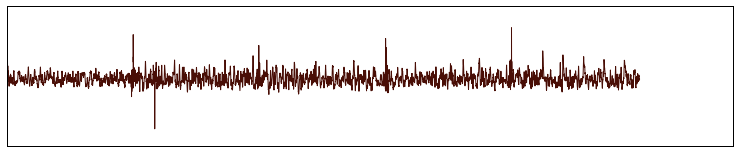

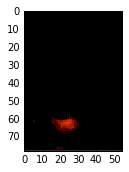

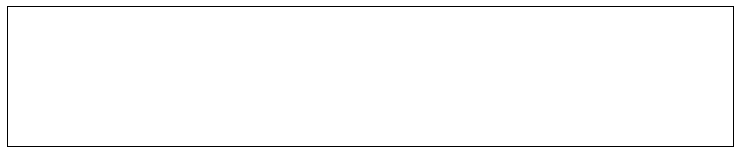

In [43]:
pylab.rcParams['figure.figsize'] = (13, 2.5)

h=5
tot=0
GoodICAnat=np.zeros(S[3])

for l in range(74):
    Final_maps=np.zeros((S[0],S[1],3))
    Fmap=np.zeros((S[0],S[1],3))
    C=np.zeros(3)

    n=0
    for i in range(len(CompMainName)):                    
        Dmmv=np.mean(data[:,:,:,i],2) 
        Dmmv[Dmmv<0.2*np.max(np.max(np.max(Dmmv)))]=0
        C=np.squeeze(np.random.rand(3,1))
        labeled, nrobject=ndimage.label(Dmmv>0)
        
        if CompMainName[i]==Names[l][0] and (sum(CompNameAdd[i,:])<5) and nrobject<200:
            n=n+1            
            
            for k in range(3):
                Fmap[:,:,k]=0.7*Dmmv*C[k]/np.max(C)
            Final_maps=Final_maps+Fmap
            #plt.plot(Time_fluoICA.T,(DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)
            plt.plot((DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)
            tot=tot+1
            GoodICAnat[i]=1
            #print(i)
            for j in range(86):
                if CompNameAdd[i,j]==1:                
                    print(Names[np.array(j)][0])
            print(i)
            
                    
    if n!=0:
        print(Names[l][1])
        #plt.ylim(-5,5)
        plt.show()
        FM=Final_maps/np.max(np.max(Final_maps))
        FM[FM<0.1]=0
        plt.imshow(FM,interpolation='none')
        plt.show()
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
        


##### Looked at the components maps and time series and remove all the components which are localized on the edge of the brain and with activity unlike GCaMP6 transients.


In [18]:
BadICs=[105,103,191,195,198,10,141,37,74,16,39,43,64,67,68,214,223,199,224,174,0,89,38,117,206,213,71,94,110,77,124,129,145,181,185,197,201,205,218,219,222,225,226,227,228,229,230,231,232,233,234,235,236,237]

In [19]:
for idx in BadICs:
    GoodICAnat[idx] = 0.0

# Reorder by larger sub-regions (~ presumed stimulus to motor)

In [20]:
LargerRegionsDic={'':'','AME_R':'OL','LO_R':'OL','NO':'CX','BU_R':'CX','PB':'CX','LH_R':'LH','LAL_R':'LX','SAD':'PENP'
               ,'CAN_R':'PENP','AMMC_R':'PENP','ICL_R':'INP','VES_R':'VMNP','IB_R':'INP','ATL_R':'INP','CRE_R':'INP'
               ,'MB_PED_R':'MB','MB_VL_R':'MB','MB_ML_R':'MB','FLA_R':'PENP','LOP_R':'OL','EB':'CX','AL_R':'AL',
                'ME_R':'OL','FB':'CX','SLP_R':'SNP','SIP_R':'SNP','SMP_R':'SNP','AVLP_R':'VLNP','PVLP_R':'VLNP',
                'IVLP_R':'VLNP','PLP_R':'VLNP','AOTU_R':'VLNP','GOR_R':'VMNP','MB_CA_R':'MB','SPS_R':'VMNP',
                'IPS_R':'VMNP','SCL_R':'INP','EPA_R':'VMNP','GNG':'GNG','PRW':'PENP','GA_R':'LX','AME_L':'OL'
                ,'LO_L':'OL','BU_L':'CX','LH_L':'LH','LAL_L':'LX','CAN_L':'PENP','AMMC_L':'PENP','ICL_L':'INP',
                'VES_L':'VMNP','IB_L':'INP','ATL_L':'INP','CRE_L':'INP','MB_PED_L':'MB','MB_VL_L':'MB',
                'MB_ML_L':'MB','FLA_L':'PENP','LOP_L':'OL','AL_L':'AL','ME_L':'OL','SLP_L':'SNP','SIP_L':'SNP',
                'SMP_L':'SNP','AVLP_L':'VLNP','PVLP_L':'VLNP','IVLP_L':'VLNP','PLP_L':'VLNP','AOTU_L':'VLNP',
                'GOR_L':'VMNP','MB_CA_L':'MB','SPS_L':'VMNP','IPS_L':'VMNP','SCL_L':'INP','EPA_L':'VMNP','GA_L':'LX'}

SmallRegionsSorted=['ME_L','ME_R','LO_R','LO_L','LOP_R','LOP_L','AME_R','AME_L',
                  'PLP_R','PLP_L','PVLP_R','PVLP_L','AVLP_R','AVLP_L','AOTU_R','AOTU_L','IVLP_R','IVLP_L',
                  'AL_R','AL_L',
                  'MB_CA_R','MB_CA_L','MB_PED_R','MB_PED_L','MB_VL_R','MB_VL_L','MB_ML_R','MB_ML_L',
                  'SMP_R','SMP_L','SIP_R','SLP_L','SLP_R','SIP_L',
                  'LH_R','LH_L',                  
                  'CRE_R','CRE_L','ICL_R','ICL_L','SCL_R','SCL_L','IB_R','IB_L','ATL_R','ATL_L',
                  'EB','PB','NO','FB',
                  'BU_R','BU_L','LAL_R','LAL_L','GA_R','GA_L',
                  'GOR_R','GOR_L','EPA_R','EPA_L','VES_R','VES_L','SPS_R','SPS_L','IPS_R','IPS_L',
                  'AMMC_R','AMMC_L','SAD','FLA_R','FLA_L','PRW','CAN_R','CAN_L',
                  'GNG','']

Tozip=range(len(SmallRegionsSorted))
SmallRegionsDic=dict(zip(SmallRegionsSorted,Tozip))

LargerRegion=[LargerRegionsDic[CompMainName[i]] for i in range(S[3])]

LargerRegionInd={ 'OL':1,'VLNP':2,'VMNP':3,'AL':4,'MB':5,'LH':6,'SNP':7,'CX':8,'LX':9,'INP':10,'PENP':11,'GNG':12,'':13}

LargerRegionI=np.array([LargerRegionInd[LargerRegion[i]] for i in range(S[3])])

SmallRegion=np.array([SmallRegionsDic[CompMainName[i]] for i in range(S[3])])

NewOrder=np.argsort(SmallRegion)

SmallRegion[NewOrder]

array([ 0,  0,  0,  1,  1,  1,  1,  1,  2,  2,  2,  2,  3,  3,  3,  3,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,
        6,  8,  8,  8,  8,  8,  8,  8,  9, 12, 15, 15, 15, 17, 18, 18, 19,
       19, 19, 19, 19, 20, 20, 20, 21, 21, 21, 21, 23, 24, 24, 24, 25, 25,
       25, 25, 25, 25, 25, 28, 28, 28, 28, 29, 29, 29, 29, 29, 31, 31, 32,
       33, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 41, 42, 42, 43, 43, 44,
       44, 44, 44, 44, 45, 46, 47, 47, 47, 47, 47, 47, 47, 47, 47, 48, 49,
       52, 62, 62, 62, 62, 62, 63, 63, 63, 64, 64, 64, 64, 64, 66, 66, 71,
       72, 72, 72, 72, 73, 73, 73, 73, 73, 74, 74, 74, 74, 74, 74, 74, 74,
       74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74,
       74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74,
       74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74,
       74, 74, 74, 74, 74

In [21]:
LargerRegionIndToName = {v: k for k, v in LargerRegionInd.iteritems()}

In [22]:
LargerRegionI

array([11,  5,  5, 10,  2,  5,  1,  5,  1,  5, 11,  2,  4,  6,  4,  8,  1,
       12, 10,  7,  2,  6,  5,  1,  6,  1,  7, 12,  7, 12,  6,  5, 12,  2,
       12, 12,  5,  5,  4,  1,  1,  3,  5,  1,  4,  6,  2, 12, 12, 12, 12,
       10, 12,  4,  1, 12, 10,  3,  3,  6, 12,  7, 12,  6,  1, 12,  3,  1,
        1, 12,  2,  5,  7, 12,  5, 12,  3,  1, 10,  3,  4, 13,  8, 12, 12,
        6, 12,  7, 12, 11, 12,  3,  2,  5,  5, 12,  2,  7, 11,  3,  2, 12,
       12, 11,  6,  1, 12, 12, 12, 10,  5,  6,  2,  1,  1, 12, 12, 11, 12,
       12, 10, 12, 12, 12,  1,  1,  8,  8, 12,  1,  8, 12,  1,  1, 12, 12,
       12,  7,  7,  2, 12, 10, 12, 12, 12,  1,  3, 12, 10, 12, 12,  3,  5,
        1, 12, 12, 12, 12, 12, 12, 12,  1, 12,  8,  8, 10, 12, 12,  7,  8,
       12, 12, 12,  7,  7, 12, 12,  3,  5,  2, 12,  1,  5,  3, 12,  1, 12,
       12,  4,  7, 12, 11, 12, 10,  1, 11, 12,  1, 11,  1,  2,  1,  8,  3,
       12,  1, 11, 12,  8, 12,  8, 12,  8, 11,  1,  9, 11,  1,  1,  1, 13,
        1,  1,  1,  1,  1

In [23]:
GoodICAnat

array([ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,
        1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,
        0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,
        1.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,
        1.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,
        1.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,
        1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,
        0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,
        1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,
        1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  0

OL
6
8
23
25
40
54
113
114
132
133
153
194


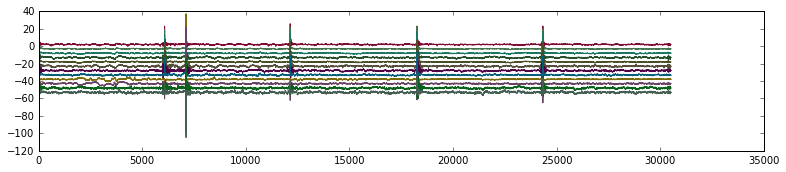

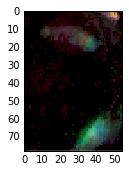

VLNP
4
11
20
33
46
70
92
96
100
112
139
179
200


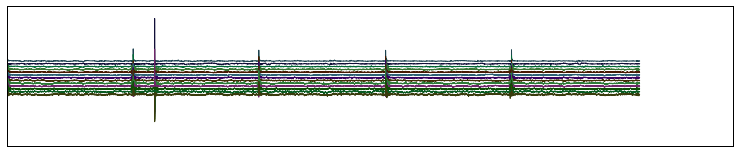

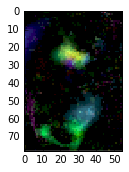

VMNP
41
57
58
66
76
91
99
146
151
177
183
203


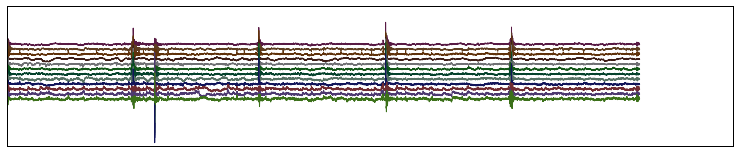

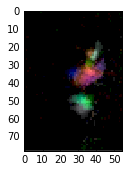

AL
12
14
44
53


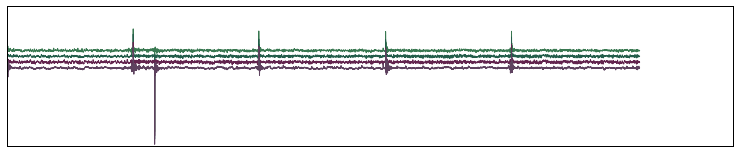

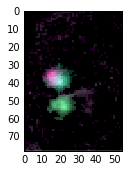

MB
1
2
5
7
9
22
31
36
42


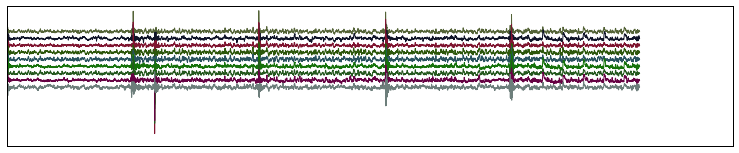

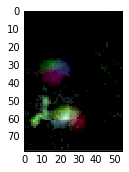

LH
13
21
24
30
45
59
63
85
104
111


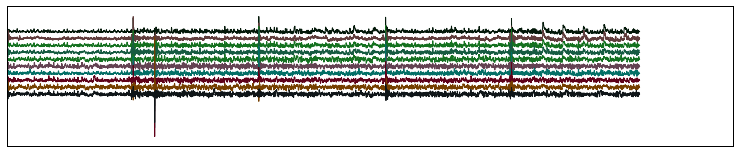

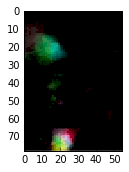

SNP
19
26
28
61
72
87
97
137
138
168
173


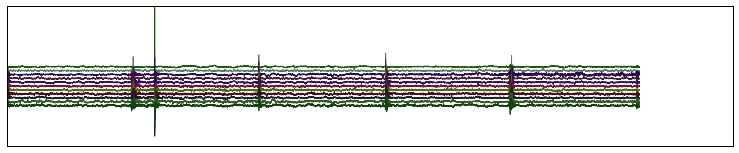

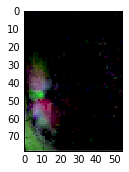

CX
15
82
126
127
163
164
169
202
210
212


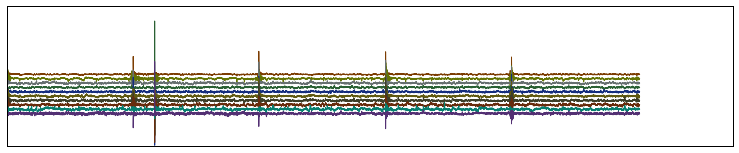

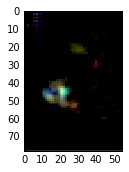

LX
INP
3
18
51
78
109
120
148
165


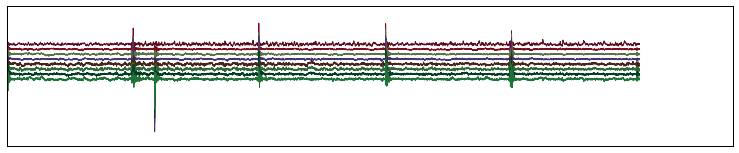

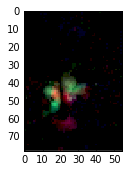

PENP
98


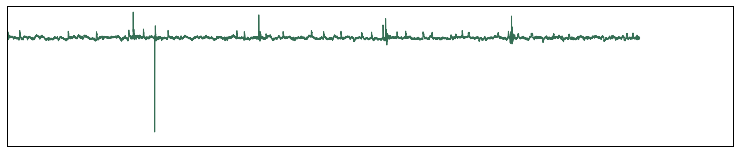

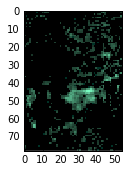

GNG
17
27
29
32
34
35
47
49
50
52
55
60
65
69
73
83
84
86
88
90
95
101
102
106
107
108
115
116
118
119
121
122
123
128
131
135
136
140
142
143
144
147
149
154
155
156
157
158
159
160
162
166
170
171
172
175
176
184
186
187
190
192
196
204
207
209
211


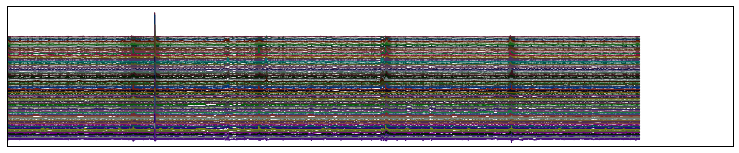

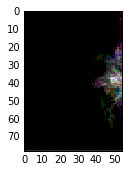

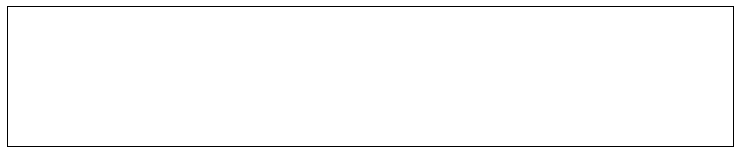

In [24]:
pylab.rcParams['figure.figsize'] = (13, 2.5)

h=5
tot=0
NumberInLargeRegion=np.zeros(13)

for l in range(1,13):
    print(LargerRegionIndToName[l])
    Final_maps=np.zeros((S[0],S[1],3))
    Fmap=np.zeros((S[0],S[1],3))
    C=np.zeros(3)

    n=0
    for i in range(len(CompMainName)):                    
        Dmmv=np.mean(data[:,:,:,i],2) 
        Dmmv[Dmmv<0.2*np.max(np.max(np.max(Dmmv)))]=0
        C=np.squeeze(np.random.rand(3,1))
        labeled, nrobject=ndimage.label(Dmmv>0)
        
        if LargerRegionI[i]==l:          
            if GoodICAnat[i]==1:
                for k in range(3):
                    Fmap[:,:,k]=0.7*Dmmv*C[k]/np.max(C)
                Final_maps=Final_maps+Fmap
                #plt.plot(Time_fluoICA.T,(DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)
                plt.plot((DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)
                tot=tot+1
                print(i)
                n=n+1 
                    
    if n!=0:

        plt.show()
        FM=Final_maps/np.max(np.max(Final_maps))
        FM[FM<0.1]=0
        plt.imshow(FM,interpolation='none')
        plt.show()
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
        
    NumberInLargeRegion[l]=n

In [25]:
# Output number of component per region
np.savetxt('/'.join(filename.split('/')[:-1])+'/NumberInLargeRegions.txt',NumberInLargeRegion)